*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

Let's use Denominator-layout notation

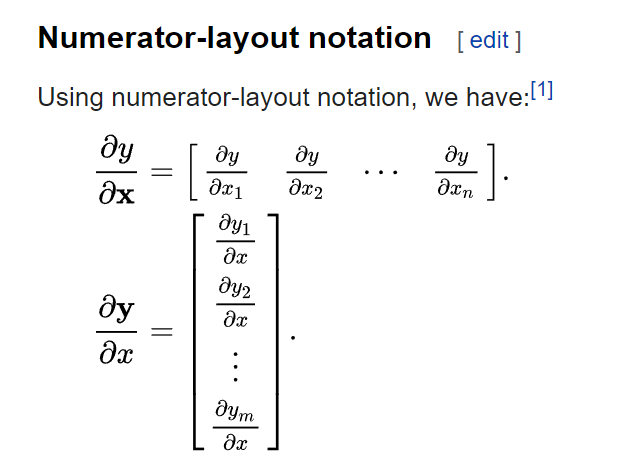

This means that the result has the same dimension as on what we are differentiating

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$ 

$$  
x - (n \times 1)\text{  vector, so}
$$
$$
y = \sum_{i=1}^Nx_i^2
$$
$$
\frac{dy}{dx} = \sum_{i=1}^N\frac{d(x_ix_i)}{dx} 
$$
$$
\frac{dy}{dx_k} = \sum_{i=1}^N\frac{d(x_ix_i)}{dx_k}= \sum_{i=1}^Nx_i\frac{d(x_i)}{dx_k} + \sum_{i=1}^Nx_i\frac{d(x_i)}{dx_k} = 2\sum_{i=1}^Nx_i\frac{d(x_i)}{dx_k}=2\sum_{i=1}^Nx_i\delta_{ik} = 2x_k
$$ 

$$
\frac{dy}{dx} = \sum_{i=1}^N\frac{d(x_ix_i)}{dx} = 2x
$$


## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

$$
tr(AB) = \sum_{i=1}^Na_i^Tb_i, \quad where\quad a_i, b_i - vectors
$$

$$
\frac{d(a_i^Tb_i)}{da_{ik}} = \sum_{m=1}^N\frac{d(a_{ml}b_{lm})}{d(a_{ik})} = \sum_{m=1}^Nb_{lm}\frac{d(a_{ml})}{d(a_{ik})}=\sum_{m=1}^Nb_{lm}\delta_{mi}\delta_{kl} = b_{ki}
$$

$$
\frac{d(a_i^Tb_i)}{da_i} = b_i^T
$$
So
$$
\frac{d(tr(AB))}{dA} = B^T
$$

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$ 

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

$$
(x^TA)_k = \sum_{i=1}^Nx_ia_{ik} \quad x^TAc =\sum_{k=1}^N \sum_{i=1}^Nx_ia_{ik}c_k
$$

$$
\frac{d(x^TAc)}{dx_m} =\sum_{k=1}^N \sum_{i=1}^N\frac{d(x_ia_{ik}c_k)}{d(x_m)}=\sum_{k=1}^N \sum_{i=1}^Na_{ik}c_k\frac{d(x_i)}{d(x_m)}=\sum_{k=1}^N \sum_{i=1}^Na_{ik}c_k\delta_{im}=\sum_{k=1}^N a_{mk}c_k=(Ac)_m
$$

$$
\frac{d(x^TAc)}{dx} = Ac
$$
$$
\frac{d(x^TAc)}{d(a_{ml})} =\sum_{k=1}^N \sum_{i=1}^N\frac{d(x_ia_{ik}c_k)}{d(a_{ml})}=\sum_{k=1}^N \sum_{i=1}^Nx_ic_k\frac{d(a_{ik})}{d(a_{ml})}=\sum_{k=1}^N \sum_{i=1}^Nx_ic_k\delta_{im}\delta_{lk}=x_mc_l
$$

$$
\frac{d(x^TAc)}{d(A)}= xc^T
$$


## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="https://github.com/girafe-ai/ml-course/blob/22f_basic/homeworks/lab01_ml_pipeline/grad.png?raw=1">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

I think, I can use the same idea as in the previous tasks: 

$$
J = || X - AS ||_F^2  =\sum_{i}\sum_{j}(x_{ij}-a_{ik}s_{kj})^2
$$

$$
\frac{\sum_{i}\sum_{j}d(x_{ij}-a_{ik}s_{kj})^2}{d(s_{ml})} = \sum_{i,j}2(x_{ij}-a_{ik}s_{kj})\frac{d(x_{ij}-a_{ik}s_{kj})}{d(s_{ml})}=\sum_{i,j}2a_{ik}(-x_{ij}+a_{ik}s_{kj})\frac{d(s_{kj})}{d(s_{ml})} = \sum_{i,j}2a_{ik}(a_{ik}s_{kj}-x_{ij})\delta_{km}\delta_{jl}=\sum_{i}2a_{im}(a_{im}s_{ml}-x_{il})=(2A^T(AS-X))_{ij}
$$

$$
\frac{dJ}{dS}=2A^T(AS-X)
$$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*




Картинка из блокнота: 

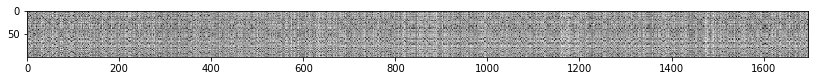

Строчки - тестовые данные, колонки - трейн.

Белый показывает, что расстояние большое, черный - близкое. 

Соотвествественно, светлые строчки - говорят, что данный тестовый семпл находится далеко от всех трейновых данных и, следовательно, можно предположить, что это выброс (аналогично, для светлых столбцов, выброс в тестовой выборке).


Однако, можно предположить, что данные распределены как будто немного со сдвигом (см. картинку), что может говорить о разных проблемах, например, о не очень удачном разделени на трейн и тест или изначально недостаточной выборке. Для проверки этой гипотезы, необходимо посмотреть на рапределение данных в признаковом пространстве. 

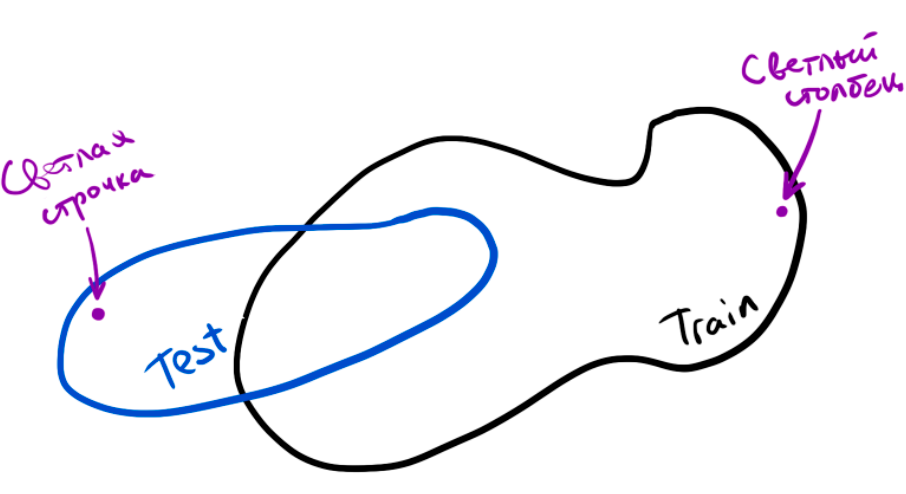

### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*


*Your Explanation:*



У нас есть два изображения в виде матриц, L1 расстояние между ними: $$L_1 : \sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-p_{ij}^{(m)}|$$

**1.** Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)

т.к. среднее отнимится от всех пикселей одинаково, то расстояние не поменяется: $$\sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-\mu-(p_{ij}^{(m)}-\mu)| = \sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-p_{ij}^{(m)}|$$ 

**2.** Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
В этом случае также не поменяется, поскольку значение, хоть и уникальное для каждого пикселя, по выборке будет одинаковое:   $$\sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-\mu_{ij}-(p_{ij}^{(m)}-\mu_{ij})| = \sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-p_{ij}^{(m)}|$$ 

Стоит добавить, что такие операци ни что иное, как смещение датасета относительно начала оси координат, поэтому расстояния между 
элементами не меняются.

**3.** Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.

В этом случае произойдет деформирование наших данных, однако на качество классификации это не отразится, поскольку расстояния изменятся пропорционально. 
$$\sum_{i=1}^{h}\sum_{j=1}^{w}|\frac{p_{ij}^{(k)}-\mu}{σ}-\frac{(p_{ij}^{(m)}-\mu)}{\sigma}| =\frac{1}{\sigma} \sum_{i=1}^{h}\sum_{j=1}^{w}|p_{ij}^{(k)}-p_{ij}^{(m)}|$$ 

**4.** Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.

В этом случае поменяется масштаб каждой оси, поэтому норма поменяется.
$$\sum_{i=1}^{h}\sum_{j=1}^{w}|\frac{p_{ij}^{(k)}-\mu}{\sigma_{ij}}-\frac{(p_{ij}^{(m)}-\mu)}{\sigma_{ij}}| = \sum_{i=1}^{h}\sum_{j=1}^{w}|\frac{p_{ij}^{(k)}-p_{ij}^{(m)}}{\sigma_{ij}}|$$ 

**5.** Rotating the coordinate axes of the data.

L1 норма изменится. В качестве доказательства рассмотрим такой пример. Рассмотрим двумерный случай и возьмем одну точку в начале координат, а другую на оси:

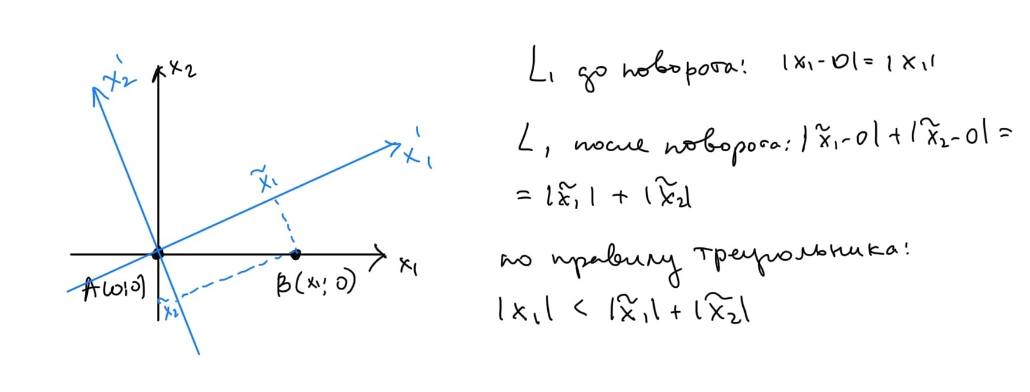

Соотвественно, в случае больших рамзерностей также норма изменится.

**Ответ:** Качество классификации при использовании L1 нормы не изменится в случаях 1, 2, 3.

## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*


*Your Explanation:*




**1.** The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.

Нет. Сложно говорить о разделяющей гиперплоскости в задачи kNN, кажется, что ее нет (она может быть произвольной, мы изначально не строим разделяющую поверхность).


**2.** The training error of a 1-NN will always be lower than that of 5-NN.

Да, это так. Если мы будем мерить ошибку на трейне и будем брать эту точку, то ее ближайший сосед - она сама, поэтому ошибка будет 0. В случаее с 5-NN так уже не получится.


**3.** The test error of a 1-NN will always be lower than that of a 5-NN.

Нет, поскольку 1-NN легко переобучается и может легко ошибаться на выбросах или граничных объектах. (Пример см. картинку). 
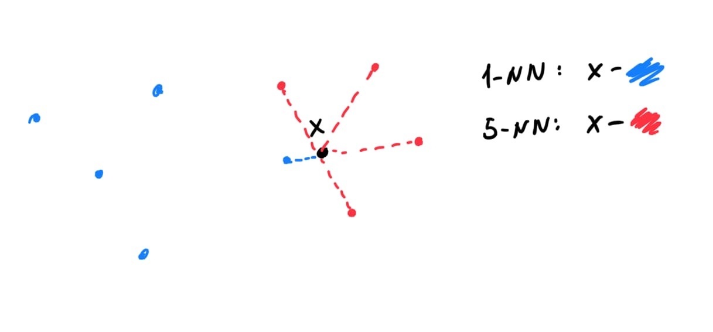



**4.** The time needed to classify a test example with the k-NN classifier grows with the size of the training set.

Да, так как нам необходимо проходить по всем элементам трейна, чтобы найти ближайших соседей. Соответственно, время выполнения будет расти при увеличении трейн датасета. 

**Ответ:** Правдивые для kNN утверждения 2 и 4.
